In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/partidos_cebollitas.csv')
df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [10]:
# New feature: Goal Difference (Home - Away)
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']
df[['goles_local', 'goles_visitante', 'diferencia_goles']].head()

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2


In [11]:
# New feature: Goal kicks per possession rate (Home)
df['ratio_tiros_posesion_local'] = df['tiros_arco_local'] / (df['posesion_local (%)'])
df[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head()

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615


In [14]:
df_cebollitas = df[(df['equipo_local'] == 'Cebollitas FC') | (df['equipo_visitante'] == 'Cebollitas FC')]

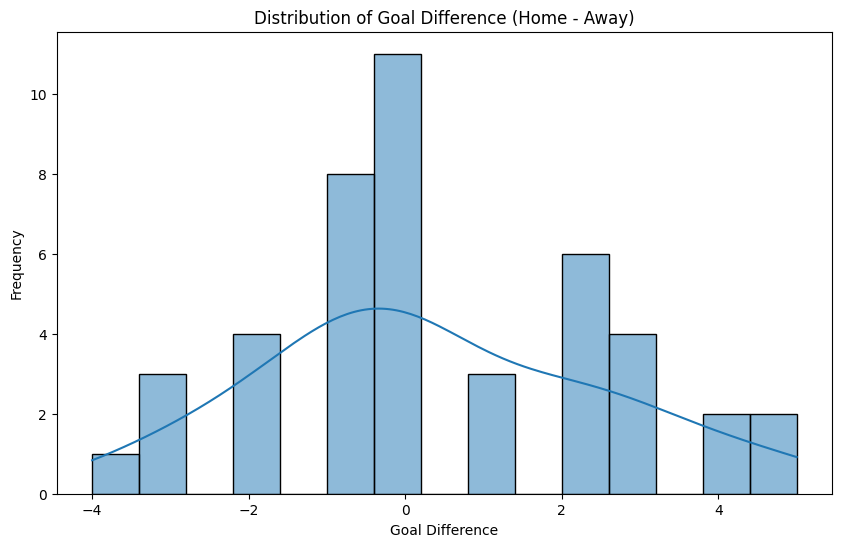

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Goal difference distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cebollitas['diferencia_goles'], bins=15, kde=True)
plt.title('Distribution of Goal Difference (Home - Away)')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency')
plt.show()

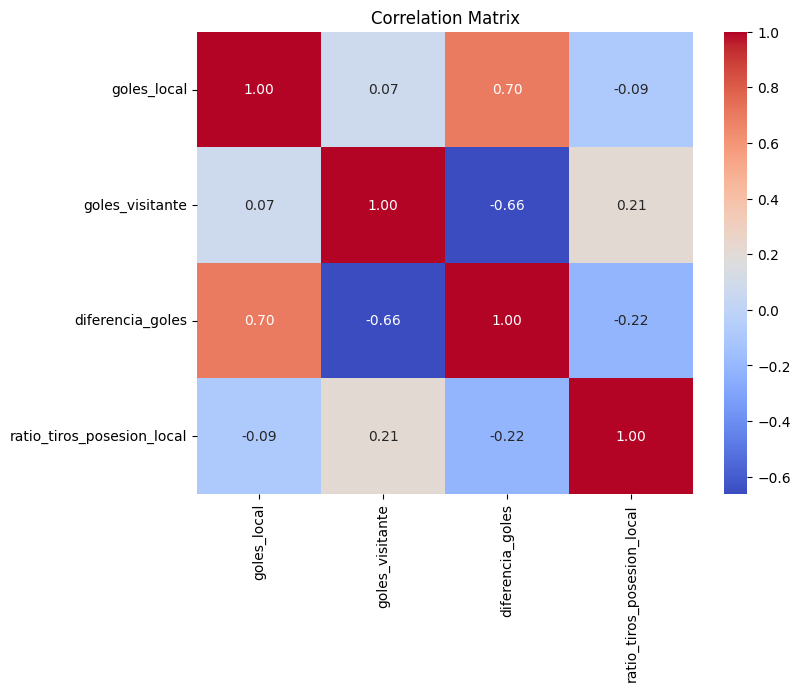

In [16]:
# Correlation heatmap
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'ratio_tiros_posesion_local']
corr_matrix = df_cebollitas[corr_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()